# Data Visual 4 – Number of Male and Female Graduates Across Singapore’s Education Institutions Over the Years - Scatter Plot + Line Chart

## Step 1 - Import Libraries

In [2]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

## Step 2 - Connect to SQL Database and Retrieve Data Table

In [3]:
# Database connection configuration
db_config = {
    'user': 'weaver', 
    'password': 'web101SG', 
    'host': 'localhost',
    'database': 'dbsingaporepoly',  
}

# Establish a connection to the database
conn = mysql.connector.connect(**db_config)

# Query to load the processed data from the MySQL table
query = "SELECT * FROM graduatesbyinstitutions_processed"

# Load the data into a pandas DataFrame
graduates_data = pd.read_sql(query, conn)

# Close the database connection
conn.close()

C:\Users\wrait\AppData\Local\Temp\ipykernel_37912\3238291151.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  graduates_data = pd.read_sql(query, conn)


## Step 3 - Setup Variables

In [4]:
# List of institutes
institutes = graduates_data.columns[2:]  # Extract first two columns which are 'year' and 'sex'

# Generate a color map with distinct colors for each institute
colors = cm.get_cmap('tab20', len(institutes))

C:\Users\wrait\AppData\Local\Temp\ipykernel_37912\972834772.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(institutes))


## Step 4 - Plot the Line Chart

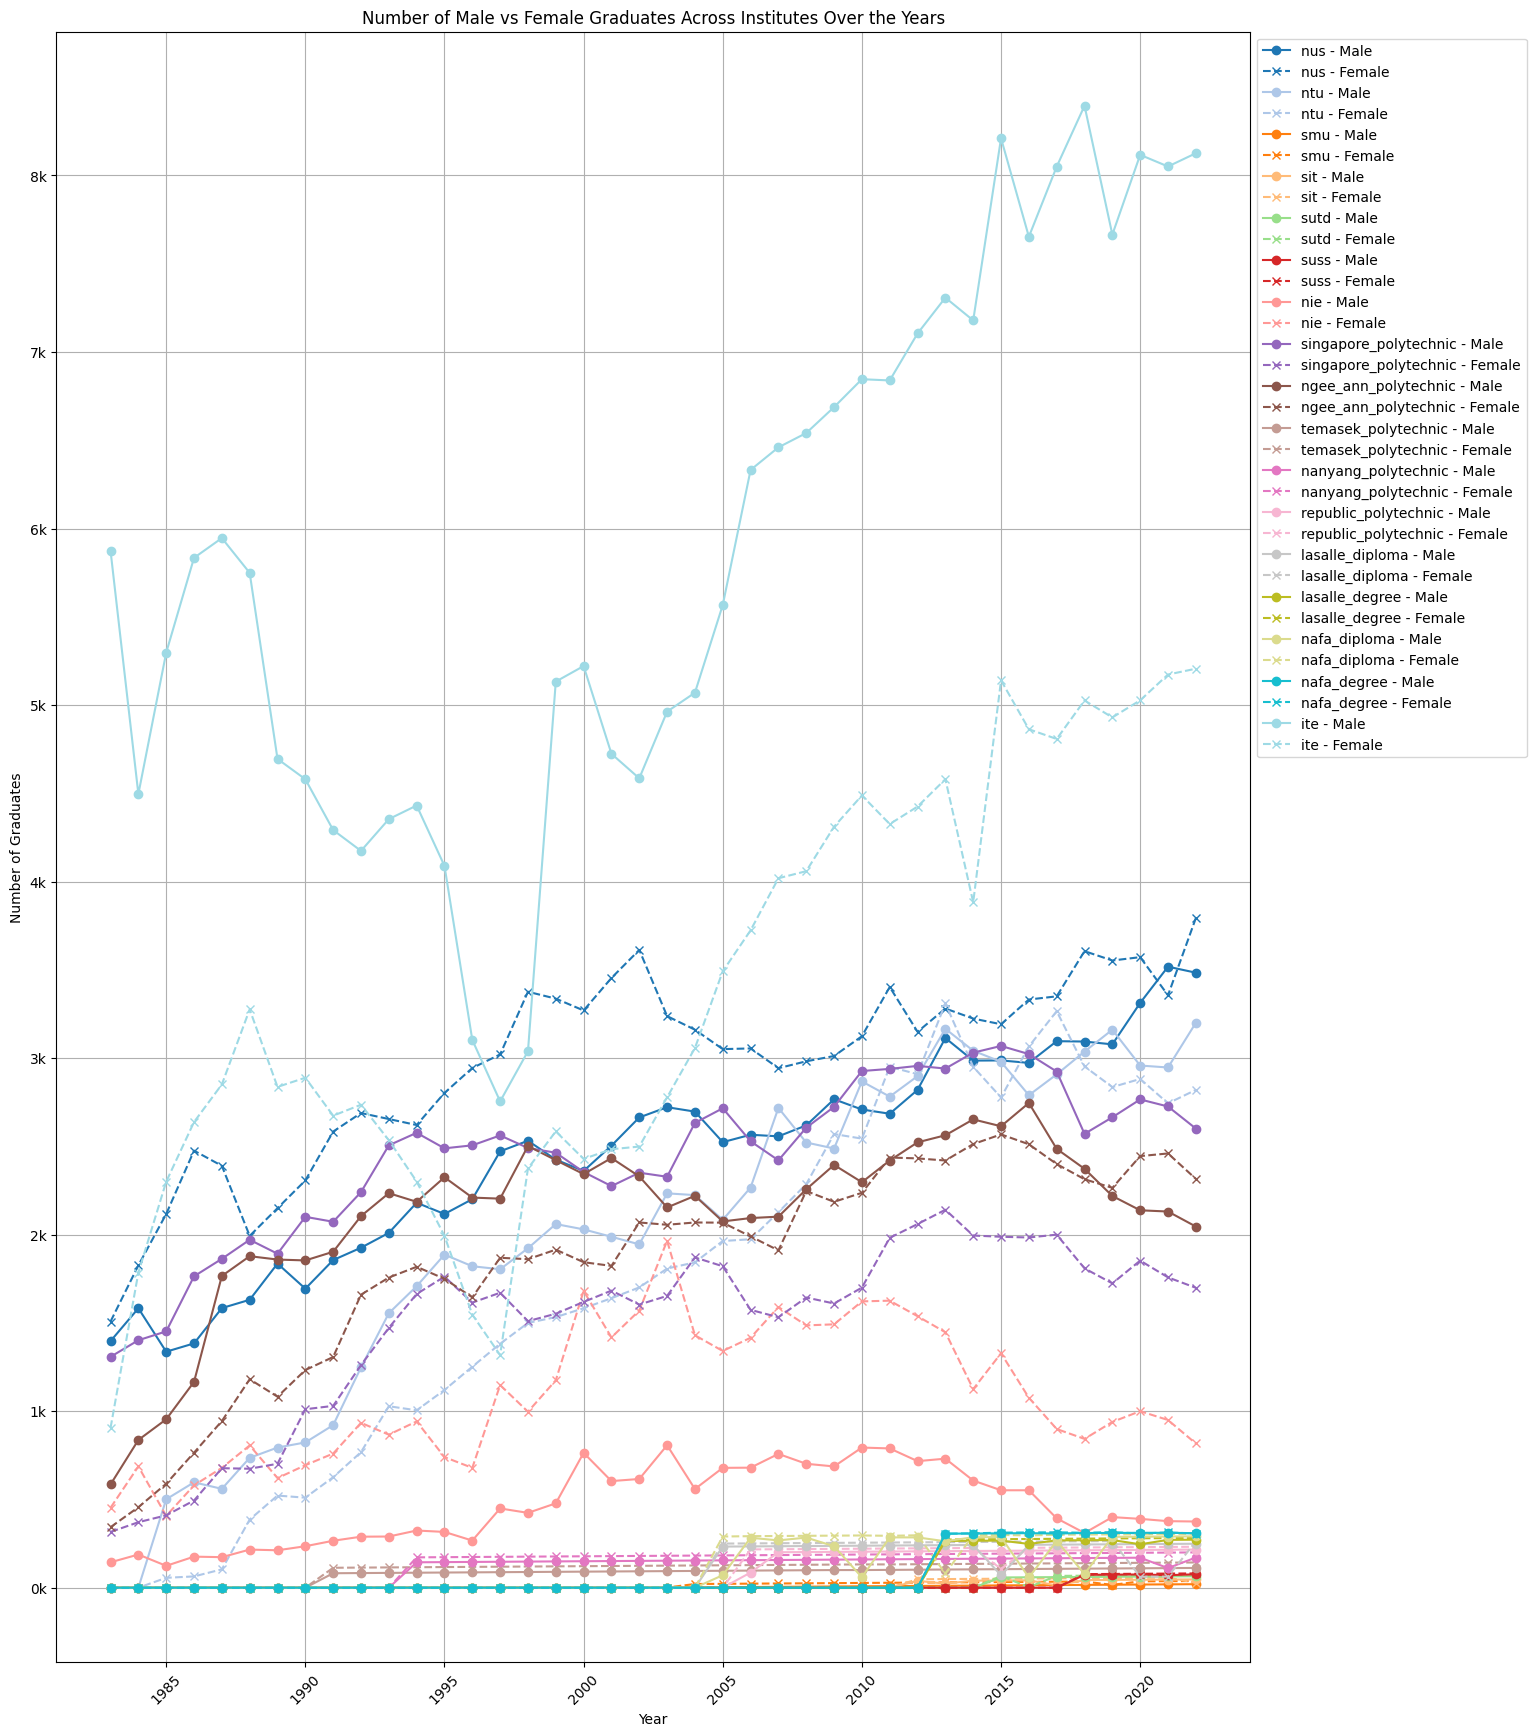

In [12]:
# Plot setup
plt.figure(figsize=(16, 18))

# Plot a line for each institute with different colors, dots for male and female
for i, institute in enumerate(institutes):
    # Filter data for male and female graduates
    male_data = graduates_data[(graduates_data['sex'] == 'M') & (graduates_data[institute].notna())]
    female_data = graduates_data[(graduates_data['sex'] == 'F') & (graduates_data[institute].notna())]

    # Plot the lines
    plt.plot(male_data['year'], male_data[institute], label=f'{institute} - Male', linestyle='-', marker='o', color=colors(i))
    plt.plot(female_data['year'], female_data[institute], label=f'{institute} - Female', linestyle='--', marker='x', color=colors(i))

# Customize the plot
plt.title('Number of Male vs Female Graduates Across Institutes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000], ['0k', '1k', '2k', '3k', '4k', '5k', '6k', '7k', '8k'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)

# Save the plot as a JPEG file
plt.savefig('../2_Charts/2_DataViz4_graduates_plot.jpg', format='jpg', dpi=300)

# Display the plot
plt.show()
